In [0]:
dbutils.fs.ls("/FileStore/tables/heart_data/heart_2020_cleaned.csv")

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/heart_data/heart_2020_cleaned.csv', name='heart_2020_cleaned.csv', size=25189554, modificationTime=1727489989000)]

In [0]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Suppressing all warnings
import warnings
warnings.filterwarnings("ignore")

In [0]:
# File location and type
file_location = "/FileStore/tables/heart_data/heart.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

In [0]:
heart = df.toPandas()


In [0]:
# Display the first few rows of the dataset
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [0]:
# Summary statistics
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int32  
 1   sex       1025 non-null   int32  
 2   cp        1025 non-null   int32  
 3   trestbps  1025 non-null   int32  
 4   chol      1025 non-null   int32  
 5   fbs       1025 non-null   int32  
 6   restecg   1025 non-null   int32  
 7   thalach   1025 non-null   int32  
 8   exang     1025 non-null   int32  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int32  
 11  ca        1025 non-null   int32  
 12  thal      1025 non-null   int32  
 13  target    1025 non-null   int32  
dtypes: float64(1), int32(13)
memory usage: 60.2 KB


The average cholesterol among the population within the dataset: 246.0


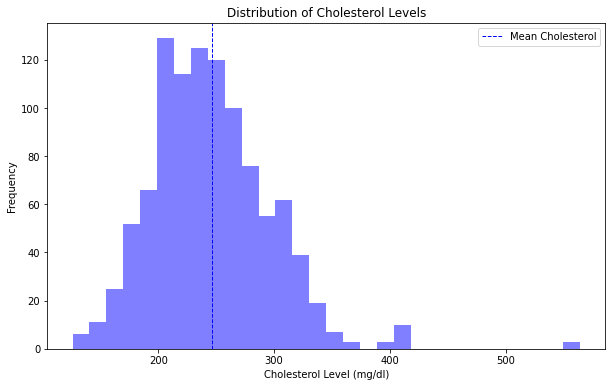

In [0]:
# Calculate mean cholesterol levels for the entire dataset
mean_total = np.mean(heart['chol'])

# Print the average cholesterol level
print('The average cholesterol among the population within the dataset:', mean_total)

# Plot overlapping histograms
plt.figure(figsize=(10, 6))
plt.hist(heart['chol'], bins=30, alpha=0.5, color='blue')
plt.axvline(mean_total, color='blue', linestyle='dashed', linewidth=1, label='Mean Cholesterol')
plt.xlabel('Cholesterol Level (mg/dl)')
plt.ylabel('Frequency')
plt.title('Distribution of Cholesterol Levels')
plt.legend()
plt.show()

In [0]:
from scipy.stats import ttest_1samp

# Perform one-sample t-test
tstat, pval = ttest_1samp(heart['chol'], 240)

# Interpret the results
alpha = 0.05  # Significance level
alpha /= 2  # One-tailed test, divide alpha by 2 for one-sided test

# Print the results
print("One-Tailed One-Sample T-Test Results:")

# Check if p-value is less than alpha
if pval < alpha:
    print("Reject H0: There is enough evidence to conclude that the mean cholesterol is higher than the commonly accepted threshold of 240 mg/dl.")
else:
    print("Fail to reject H0: There is not enough evidence to conclude that the mean cholesterol is higher than the commonly accepted threshold of 240 mg/dl.")

One-Tailed One-Sample T-Test Results:
Reject H0: There is enough evidence to conclude that the mean cholesterol is higher than the commonly accepted threshold of 240 mg/dl.


The average thalach for patients with heart disease in the population within the dataset: 158.58555133079847
The standard deviation of thalach for patients with heart disease in the population within the dataset: 19.078766599604755
The average thalach for patients without heart disease in the population within the dataset: 139.1302605210421
The standard deviation of thalach for patients without heart disease in the population within the dataset: 22.54261309037062
Ratio of standard deviations (HD group / No HD group): 0.8463422817541285


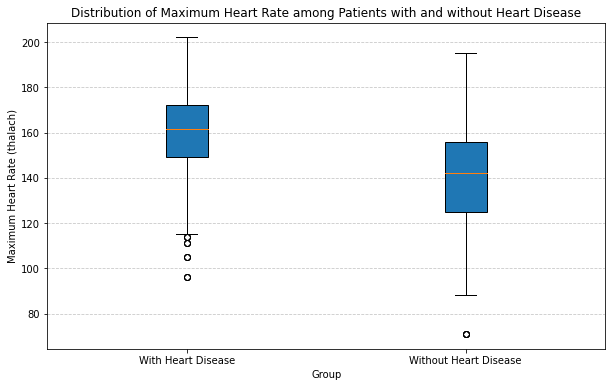

In [0]:
# Calculate mean and standard deviation of thalach levels for the groups with and without heart disease
hd_thalach = heart[heart['target'] == 1]['thalach']
mean_hd_thalach = np.mean(hd_thalach)
std_hd_thalach = np.std(hd_thalach)
print('The average thalach for patients with heart disease in the population within the dataset:', mean_hd_thalach)
print('The standard deviation of thalach for patients with heart disease in the population within the dataset:', std_hd_thalach)

no_hd_thalach = heart[heart['target'] == 0]['thalach']
mean_no_hd_thalach = np.mean(no_hd_thalach)
std_no_hd_thalach = np.std(no_hd_thalach)
print('The average thalach for patients without heart disease in the population within the dataset:', mean_no_hd_thalach)
print('The standard deviation of thalach for patients without heart disease in the population within the dataset:', std_no_hd_thalach)

# Calculate the ratio of standard deviations
std_ratio = std_hd_thalach / std_no_hd_thalach

print('Ratio of standard deviations (HD group / No HD group):', std_ratio)

# Plot boxplot for both groups
plt.figure(figsize=(10, 6))
plt.boxplot([hd_thalach, no_hd_thalach], patch_artist=True, labels=['With Heart Disease', 'Without Heart Disease'])
plt.xlabel('Group')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.title('Distribution of Maximum Heart Rate among Patients with and without Heart Disease')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [0]:
from scipy.stats import ttest_ind

# Perform one-tailed two-sample t-test
t_stat, p_val = ttest_ind(hd_thalach, no_hd_thalach, alternative='less')

# Print the results
print("One-Tailed Two-Sample T-Test Results:")

# Interpret the results
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: Patients without heart disease have a statistically significantly lower average maximum heart rate.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in average maximum heart rate between patients with and without heart disease, or the difference is not in the expected direction.")

One-Tailed Two-Sample T-Test Results:
Fail to reject the null hypothesis: There is no statistically significant difference in average maximum heart rate between patients with and without heart disease, or the difference is not in the expected direction.


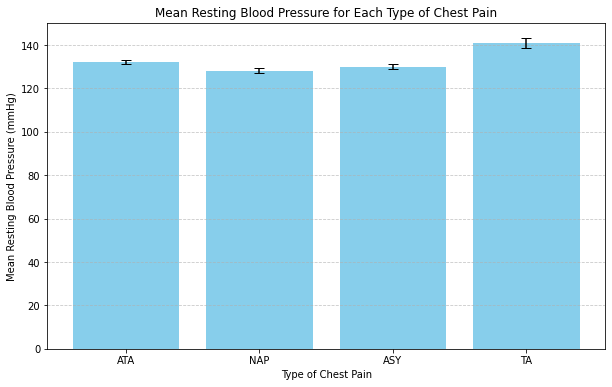

In [0]:
# Group data by chest pain type and calculate mean resting blood pressure
grouped_data = heart.groupby('cp')['trestbps'].mean().reset_index()
# Calculate standard deviation for each type of chest pain
std_dev = heart.groupby('cp')['trestbps'].std()

# Calculate standard error for each type of chest pain
sample_sizes = heart.groupby('cp').size()
std_error = std_dev / np.sqrt(sample_sizes)

# Plot a bar chart with error bars
plt.figure(figsize=(10, 6))
plt.bar(x=grouped_data['cp'], height=grouped_data['trestbps'], yerr=std_error, capsize=5, color='skyblue', label='Mean Resting Blood Pressure')
plt.xlabel('Type of Chest Pain')
plt.ylabel('Mean Resting Blood Pressure (mmHg)')
plt.title('Mean Resting Blood Pressure for Each Type of Chest Pain')
plt.xticks(grouped_data['cp'], ['ATA', 'NAP', 'ASY', 'TA']) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

In [0]:
from scipy.stats import f_oneway

# Example data
group1 = heart[heart['cp'] == 'ATA']['trestbps']
group2 = heart[heart['cp'] == 'NAP']['trestbps']
group3 = heart[heart['cp'] == 'ASY']['trestbps']
group4 = heart[heart['cp'] == 'TA']['trestbps']

# Perform ANOVA test
f_stat, p_val = f_oneway(group1, group2, group3, group4)

# Print the results
print("ANOVA Test Results:")

# Interpret the results
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in mean resting blood pressure among patients with different types of chest pain.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in mean resting blood pressure among patients with different types of chest pain.")

ANOVA Test Results:
Fail to reject the null hypothesis: There is no statistically significant difference in mean resting blood pressure among patients with different types of chest pain.


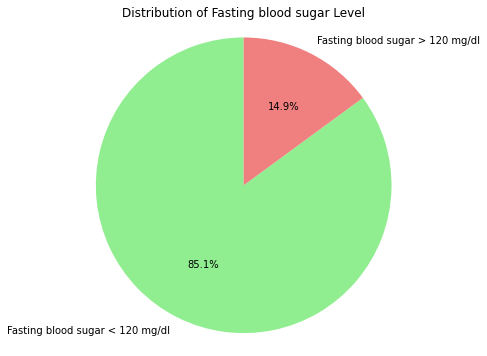

In [0]:
# Count the occurrences of each target value
fbs_counts = heart['fbs'].value_counts()

# Define custom colors
colors = ['lightgreen', 'lightcoral']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(fbs_counts, labels=['Fasting blood sugar < 120 mg/dl', 'Fasting blood sugar > 120 mg/dl'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Fasting blood sugar Level')
plt.axis('equal')  
plt.show()

In [0]:
from scipy.stats import binom_test

# Example data
num_high_fbs = heart[heart['fbs'] == 1]['fbs'].count()
total_patients = len(heart)
expected_proportion = 0.2

# Perform one-tailed binomial test (lower)
p_val = binom_test(num_high_fbs, n=total_patients, p=expected_proportion, alternative='less')

# Print the results
print("One-Tailed Binomial Test Results:")

# Interpret the results
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: The proportion of patients with high fasting blood sugar is significantly lower than 0.2.")
else:
    print("Fail to reject the null hypothesis: The proportion of patients with high fasting blood sugar is not significantly lower than 0.2.")

One-Tailed Binomial Test Results:
Reject the null hypothesis: The proportion of patients with high fasting blood sugar is significantly lower than 0.2.


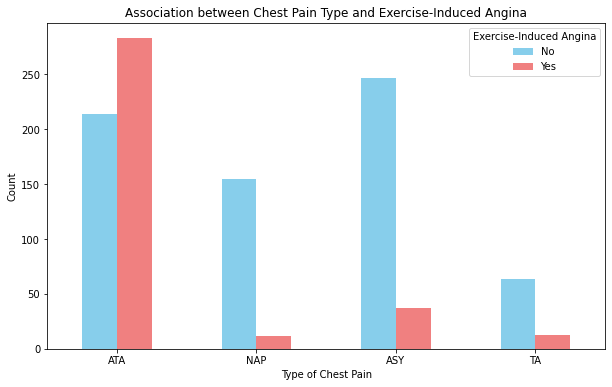

In [0]:
# Group data by 'cp' and 'exang' and count occurrences
grouped_data = heart.groupby(['cp', 'exang']).size().unstack(fill_value=0)

# Plot a grouped bar chart
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.xlabel('Type of Chest Pain')
plt.ylabel('Count')
plt.title('Association between Chest Pain Type and Exercise-Induced Angina')
plt.xticks(grouped_data.index, ['ATA', 'NAP', 'ASY', 'TA'], rotation=0) 
plt.legend(title='Exercise-Induced Angina', labels=['No', 'Yes'])
plt.show()

In [0]:
from scipy.stats import chi2_contingency

# Example data
observed_data = heart.groupby(['cp', 'exang']).size().unstack(fill_value=0)

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(observed_data)

# Print the results
print("Chi-Square Test Results:")

# Interpret the results
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant association between the type of chest pain and the presence of exercise-induced angina.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the type of chest pain and the presence of exercise-induced angina.")

Chi-Square Test Results:
Reject the null hypothesis: There is a significant association between the type of chest pain and the presence of exercise-induced angina.
